In [8]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.animation as animation
import matplotlib
print('matplotlib: '+matplotlib.__version__)
%matplotlib inline

numpy: 1.17.2
matplotlib: 3.1.1


In [9]:
Nfrm = 10
fps = 10

def generate(X, Y, phi):
    '''
    Generates Z data for the points in the X, Y meshgrid and parameter phi.
    '''
    R = 1 - np.sqrt(X**2 + Y**2)
    return np.cos(2 * np.pi * X + phi) * R

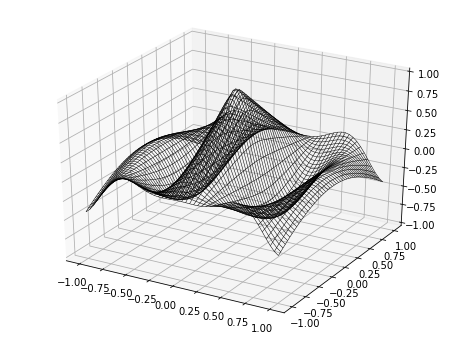

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid.
xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-1, 1)

# Begin plotting.
wframe = None
Z = generate(X, Y, 0)
def update(idx):
    phi=phis[idx]
    global wframe
    # If a line collection is already remove it before drawing.
    if wframe:
        ax.collections.remove(wframe)

    # Plot the new wireframe and pause briefly before continuing.
    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color='k', linewidth=0.5)
phis = np.linspace(0, 180. / np.pi, 100)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=1000/fps)

In [11]:
fn = 'walking'
ani.save(fn+'.html',writer='ffmpeg',fps=fps)

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.HTMLWriter'> instead.
